Directory already exists: /home/zengcc/JJ_nw_notebook/Jun12th_2025_SNS_Calc/SNS_CPR_Sep2nd/Plots_collection


/tmp/ipykernel_1421768/2216301458.py:275: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_xticklabels([r"\bf{0.5}",  r"\bf{1}"])


60
65
Plot saved to: /home/zengcc/JJ_nw_notebook/Jun12th_2025_SNS_Calc/SNS_CPR_Sep2nd/Plots_collection/Fig2_v7.png


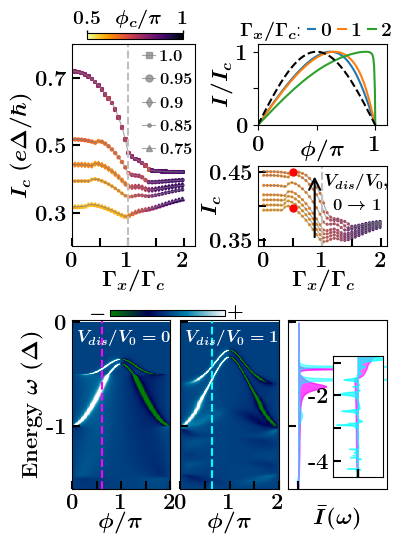

In [53]:
# Use scatter plot to indicate the skewness of the CPR.

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from read_plot_assist import *


reduced_factor = (2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9)*0.3*2 

               # such that the unit is e \Delta /hbar, factor 2 is coming from the half 1 of the electron operator 

import pandas as pd
import csv

# ======================
# 主程序
# ======================
def main():
    # 获取绘图参数
    plot_config = set_plotting_style()
    
    # 设置工作目录
    dir = os.getcwd() 
    dirF = os.path.join(dir, "Plots_collection")
    
    # 确保Plots_collection目录存在
    if not os.path.exists(dirF):
        os.makedirs(dirF)
        print(f"Created directory: {dirF}")
    else:
        print(f"Directory already exists: {dirF}")
    
    # 创建图形和布局
    ################  previous figure set   
    # width = 3.847 * 1.3
    # height = 0.64 * width*2
    # fig = plt.figure(figsize=(width, height))
    
    ############### updated figure set   
    # width = 3.847 * 2.1
    # height = 0.64 * width * 1.8

    # width = 3.847*1.6  # * 1.35
    # height = 1.4 * width #1.2 * width
    
    width = 3.847*1.0  # * 1.35
    height = 1.5 * width  #1.2 * width
    
    fig = plt.figure(figsize=(width, height))
    

    # 创建主GridSpec：2行1列
    main_gs = GridSpec(2, 1, figure=fig, height_ratios=[1.2, 1.0],hspace=0.4)
    
    # 顶部区域：创建2个面板的GridSpec
    top_gs = GridSpecFromSubplotSpec(1, 2, subplot_spec=main_gs[0], width_ratios=[1, 1.05],wspace=0.5)
    
    # top_gs_a = GridSpecFromSubplotSpec(3, 2, subplot_spec=top_gs[0,1], height_ratios=[0.1, 1, 1], width_ratios = [1,0.1]) # , hspace=0.4
    
    top_gs_a = GridSpecFromSubplotSpec(2, 1, subplot_spec=top_gs[0,1], height_ratios=[1,1],hspace=0.5)
    top_gs_b = GridSpecFromSubplotSpec(2, 1, subplot_spec=top_gs[0,0], height_ratios=[0.0,1],hspace=0.0)
    
    # 创建子图
    ax0 = fig.add_subplot(top_gs_a[0, 0])
    
    ax1 = fig.add_subplot(top_gs_b[1, 0])
    ax2 = fig.add_subplot(top_gs_a[1, 0])
    
    # ax1_bar = fig.add_subplot(top_gs_b[0, 0])
    
    # 底部区域：创建3个面板的GridSpec
    bottom_gs = GridSpecFromSubplotSpec(1, 3, subplot_spec=main_gs[1], width_ratios=[1, 1, 1],wspace=0.1)
        
    ax3 = fig.add_subplot(bottom_gs[0, 0])
    ax4 = fig.add_subplot(bottom_gs[0, 1])
    ax5 = fig.add_subplot(bottom_gs[0, 2])
    
    # 获取配置参数
    colors = plot_config['colors']
    line_styles = plot_config['line_styles']
    legend_settings = plot_config['legend_settings']
    tick_settings = plot_config['tick_settings']
    grid_settings = plot_config['grid_settings']
    sizes = plot_config['sizes']
    labelpad_distance = -1
    
    # ======================
    # Panel 1: CPR curves
    # ======================
    # # ax0 = fig.add_subplot(gs[1, 0])
    # vtaus0 = [0.842, 1.000]
    # selected_bs = [0.5, 2.0]
    
    # # 自定义离散颜色方案
    vtau_colors = {
        0.842: colors['vtau_0.50'],
        0.882: colors['vtau_0.80'],
        0.904: colors['vtau_0.90'],
        0.934: colors['vtau_0.95'],
        1.000: colors['vtau_1.00']
    }
    
    # # 绘制数据
    # ====================== ====================== ====================== ======================
    # Panel 0: CPR for a fixed vtau, at various B
    # ====================== ====================== ====================== ======================
    Bs = [0, 1.0, 2.0]
    vtau = 0.882 
    
    file_path = f"CPR_adaptive=True_B_sweep_Vdis=0.0_Vtau={vtau:.3f}_disorder1_cp1.csv"
    # 读取数据 
    metadata, df = read_cpr_data(file_path)
    
    b_values = np.sort(df['B'].unique())
    phase_values = np.sort(df['Phase'].unique())
    
    # 重塑数据为矩阵
    current_matrix = df.pivot(index='B', columns='Phase', values='Current').values
    color = 'b'
    
    # 创建自定义图例句柄和标签
    handles = []
    labels = []
    
    # 首先添加标题作为第一个条目（使用空线但显示标签）
    from matplotlib.lines import Line2D
    title_handle = Line2D([0], [0], color='none', marker='', linestyle='')
    handles.append(title_handle)
    labels.append(r'$\boldsymbol{\Gamma_x/\Gamma_c}$:')
    
    # 然后添加实际的图例条目
    for B in Bs:
        idx = list(b_values).index(B)
        line, = ax0.plot(phase_values/np.pi, current_matrix[idx,:]/np.max(current_matrix[idx,:]),
                 '-', linewidth=line_styles['default']['linewidth'])
        handles.append(line)
        labels.append(r'$\boldsymbol{%.0f}$'%B)
    
    ax0.plot(phase_values/np.pi, np.sin(phase_values),'--',color = 'k',linewidth=1.5)
    
    # 设置轴标签
    # ax0.yaxis.set_label_position("right")
    # ax0.yaxis.set_ticks_position("right")
    
    ax0.set_xlabel(r'$\boldsymbol{\phi/\pi}$',fontsize=sizes['label'], labelpad = labelpad_distance-10) # label_dis
    
    ax0.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
    ax0.set_xticklabels([r"\bf{0}", r"", r"\bf{1}", r"", r"\bf{2}"], 
                       color=tick_settings['color'], size=sizes['tick']) 
    
    ax0.set_yticks([-1, -0.5, 0, 0.5, 1])
    ax0.set_yticklabels([r"\bf{-1}", r"", r"\bf{0}", r"", r"\bf{1}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    # 创建图例，所有内容在一排
    ax0.legend(handles, labels, 
               ncols = len(handles),  # 总列数等于句柄数量
               handlelength = 0.4, 
               handletextpad = 0.3, 
               columnspacing = 0.3,  # 增加列间距
               fontsize = 14,
               facecolor = 'none',
               edgecolor ='none',
               loc = 'upper center',
               bbox_to_anchor = (0.40, 1.5),
               frameon = False)
    
    ax0.set_ylabel(r'$\boldsymbol{I/I_{c}}$', fontsize=sizes['label'], labelpad=labelpad_distance+3)
    ax0.set_ylim([0, 1.1])
    ax0.set_xlim([0, 1.1])


    # ====================== ====================== ====================== ======================
    # Panel 1: Critical current vs B for several Dtaus
    # ====================== ====================== ====================== ======================
    
    vtaus = [0.842, 0.882, 0.904, 0.934, 1.000]
    Dtaus = [0.75, 0.85, 0.90, 0.95, 1.00]
    # 为不同 vtau 创建颜色映射
    
    line_cmap = plt.cm.jet
    vtau_colors_cmap = line_cmap(np.linspace(0,1, len(vtaus))) # 
    
    vtau_color_dict = dict(zip(vtaus, vtau_colors_cmap))
    scatter_cmap = plt.cm.inferno_r
    
    # ax1_right = ax1.twinx()

    markers = ['^','.','d','o','s']
    marker_sizes = [4,6,4,3,3]
    # ax1 = fig.add_subplot(gs[0, 0])
    handle_list = []
    # 使用离散颜色方案绘制数据
    for i0, vtau in enumerate(vtaus):
        # color = vtau_colors_cmap[i0]
        file_path = f"CPR_data_sweep_B_vtau_{vtau:.3f}_separate_summary_Vdis=0.0_disorder1_cp19th2.csv"
        # file_path = f"CPR_data_sweep_B_vtau_{vtau:.3f}_separate_summary_v0.csv"
        columns_to_read = ['B', 'Ic_max', 'Ic_min','phi0_max','phi0_min']
        
        metadata, df = read_select_data(file_path, columns_to_read=columns_to_read)

        xs = df['B'].values
        ys = (df['Ic_max'].values - df['Ic_min'].values)/2/reduced_factor
        cs = df['phi0_max'].values/np.pi
        line1, = ax1.plot(-xs-0.5, ys, color='grey', linestyle ='-', marker =markers[i0],markersize =5, 
                 linewidth =0.8, alpha=0.7, label = r"%.2f"%Dtaus[i0]) #Dtaus, fontsize= sizes['legend']
        
        ax1.plot(xs, ys, color='grey', linestyle ='-', marker =markers[i0],markersize =0, 
                 linewidth =0.8, alpha=0.7, label = r"%.2f"%Dtaus[i0]) #Dtaus, fontsize= sizes['legend']
        # print(len(xs))
        # masks = ::5
        ax1.scatter(xs[::3], ys[::3], s=marker_sizes[i0], marker= markers[i0], linestyle ='-', 
                    c=cs[::3], cmap = scatter_cmap, vmin=0.5, vmax=1, linewidth =1.5)
        handle_list.append(line1)
        
    # 设置轴标签
    ax1.set_xlabel(r'$\boldsymbol{\Gamma_{x}/\Gamma_c}$', fontsize=sizes['label'], labelpad=labelpad_distance )
    # ax1.xaxis.label.set_position((0.2, 0.05))
    
    ax1.set_ylabel(r'$\boldsymbol{I_{c}~(e\Delta/\hbar)}$', fontsize=sizes['label'],labelpad=labelpad_distance +3)
    # ax1.set_ylabel(r'', fontsize=sizes['label'])
    labels_list = [r'\bf{0.75}',r'\bf{0.85}',r'\bf{0.9}',r'\bf{0.95}',r'\bf{1.0}'] 
    
    ax1.legend(handle_list[::-1], labels_list[::-1], 
                ncols = 1,  # 总列数等于句柄数量
               handlelength = 0.8, 
               handletextpad = 0.3, 
               columnspacing = 0.08,  # 增加列间距
               fontsize = sizes['legend']-2,
               facecolor = 'none',
               edgecolor ='none',
               loc = 'upper center',
               bbox_to_anchor = (0.78, 1.05),
               frameon = False)
    
    # 设置刻度
    ax1.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
    ax1.set_xticklabels([r"\bf{0}", r"", r"\bf{1}", r"", r"\bf{2}"], 
                       color=tick_settings['color'], size=sizes['tick']) 
    
    # ax1.set_xticklabels([r"\bf{0}", r"\bf{0.5}", r"\bf{1.0}", r"\bf{1.5}", r"\bf{2.0}"], 
    #                    color=tick_settings['color'], size=sizes['tick'])

    ax1.set_yticks([0, 0.3, 0.5, 0.7, 1])
    ax1.set_yticklabels([r"\bf{0}", r"\bf{0.3}", r"\bf{0.5}",r"\bf{0.7}", r"\bf{1.0}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    ax1.set_ylim([0.2, 0.8])
    ax1.set_xlim([0, 2.2])
    ax1.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
                        
    # 设置网格
    # ax1.grid(**grid_settings)
    
    # 设置刻度方向
    ax1.tick_params(direction=tick_settings['direction'], length=tick_settings['length'], width=tick_settings['width'])

    
    cbar_ax = fig.add_axes([0.1, 0.98, 0.02, 0.35])
    
    # 创建垂直颜色条（在已有的 cbar_ax 上）
    cbar = mpl.colorbar.ColorbarBase(cbar_ax, 
                                           cmap= scatter_cmap,  # 使用其中一个colormap
                                           norm=mpl.colors.Normalize(vmin=0.5, vmax=1),
                                           orientation='horizontal')
    # cbar.ax.tick_params(labelsize=12) # ,direction ='in' # sizes['cbar_tick']
    
    cbar.ax.set_xticklabels([r"\bf{0.5}",  r"\bf{1}"])
    cbar.ax.tick_params(labelsize =  sizes['cbar_tick'],
                            length = 2.0 ,#tick_settings['length'],
                            width= 1,
                            pad= 2)
    cbar_ax.text(0.55, 1.65, r'$\boldsymbol{\phi_{c}/\pi}$',
                 transform=cbar_ax.transAxes,
                 fontsize = sizes['cbar_label'],ha='center', va='bottom')  # sizes['cbar_label']
    cbar.ax.xaxis.set_ticks_position('top')
    cbar.ax.xaxis.set_label_position('top')
    
    cbar_ax.set_position([0.12, 0.93,  0.25, 0.01])  # [左, 下, 宽, 高]    

    
    # ax1_right.set_ylim(ax3.get_ylim())
    # ax1_right.set_yticks(ax3.get_yticks())

    # ====================== ====================== ====================== ======================
    # Panel 2: CPR curves B, for single Dtau, various Vdis 
    # ====================== ====================== ====================== ======================

    # vtaus = [0.842, 0.882, 0.904, 0.934, 1.000]  [0.338] -> [0.05]
    vtau = 0.882
    
    # 1. 使用指定的透明度值
    alpha_max = 1.0
    alpha_min = 0.2
    alpha_values = [alpha_max,
                    alpha_max*0.75, 
                    alpha_max*0.5,
                    alpha_min*1.45,
                    alpha_min*1.25,
                    alpha_min*1.1,
                    alpha_min]
    
    Vdis_list = [0.0,0.1,0.2,0.3,0.5,0.8,1.0] # ,1.2,1.5,1.8
    Dtaus = [0.75, 0.85, 0.90, 0.95, 1.00]
    
    # 使用离散颜色方案绘制数据
    for i in range(len(Vdis_list)):
        # print(i)
        # color =  vtau_colors[vtau]
        
        color = vtau_color_dict[vtau]
        file_path = f"CPR_data_sweep_B_vtau_{vtau:.3f}_separate_summary_Vdis={Vdis_list[i]:.1f}_disorder1.csv"
        # columns_to_read = ['B', 'Ic_max', 'Ic_min']
        # metadata, df = read_select_data(file_path, columns_to_read=columns_to_read)

        columns_to_read = ['B', 'Ic_max', 'Ic_min','phi0_max','phi0_min']
        
        metadata, df = read_select_data(file_path, columns_to_read=columns_to_read)

        xs = df['B'].values
        ys = (df['Ic_max'].values - df['Ic_min'].values)/2/reduced_factor
        cs = df['phi0_max'].values/np.pi

        
        if i ==0:
            # pass
            # file_path = f"CPR_data_sweep_B_vtau_{0.842}_separate_summary_Vdis={Vdis_list[i]:.1f}_disorder1_cp19th.csv"
            file_path = f"CPR_data_sweep_B_vtau_{vtau:.3f}_separate_summary_Vdis={Vdis_list[i]:.1f}_disorder1_cp19th2.csv"
            columns_to_read = ['B', 'Ic_max', 'Ic_min','phi0_max','phi0_min']
        
            metadata, df = read_select_data(file_path, columns_to_read=columns_to_read)

            xs = df['B'].values
            ys = (df['Ic_max'].values - df['Ic_min'].values)/2/reduced_factor
            cs = df['phi0_max'].values/np.pi
            
            ax2.plot(xs, ys, color='grey', linestyle ='-', marker ='.',markersize =0, 
                     linewidth =0.8, alpha=0.7, label = r"%.2f"%Dtaus[i0]) #Dtaus, fontsize= sizes['legend']

            ax2.scatter(xs[::3], ys[::3], s=6, marker= '.',
                    c=cs[::3], cmap = scatter_cmap, vmin=0.5, vmax=1)
            
            # ax2.plot(df['B'].values, (df['Ic_max'].values - df['Ic_min'].values)/2/reduced_factor,
            #          '-', color=color, linewidth=line_styles['default']['linewidth'], alpha =alpha_values[i] )    
        else:

            ax2.plot(xs, ys, color='grey', linestyle ='-', marker ='.',markersize =0, 
                     linewidth = 0.8, alpha=0.7, label = r"%.2f"%Dtaus[i0]) #Dtaus, fontsize= sizes['legend']

            ax2.scatter(xs[::3], ys[::3], s=6, marker= '.',
                        c=cs[::3], cmap = scatter_cmap, vmin=0.5, vmax=1)
                        
            # ax2.plot(df['B'].values, (df['Ic_max'].values - df['Ic_min'].values)/2/reduced_factor,
            #          '-', color=color, linewidth=line_styles['default']['linewidth'], 
            #          alpha = alpha_values[i])  # 使用指定的alpha_values


    # 设置轴标签

    # ax2.yaxis.set_label_position("right")
    # ax2.yaxis.set_ticks_position("right")
    # ax.set_ylabel("Y-axis Label", rotation=-90, labelpad=15) # Adjust rotation and padding as needed


    ax2.set_xlabel(r'$\boldsymbol{\Gamma_{x}/\Gamma_c}$', fontsize=sizes['label'], labelpad=labelpad_distance)
    ax2.set_ylabel(r'$\boldsymbol{I_{c}}$', fontsize=sizes['label'],labelpad=labelpad_distance-8) # ~(e\Delta/\hbar)
    
    # 设置刻度
    ax2.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
    ax2.set_xticklabels([r"\bf{0}", r"", r"\bf{1}", r"", r"\bf{2}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    # # 2. 调整panel2的y轴范围
    
    
    ax2.set_yticks([0.35, 0.4, 0.45])
    ax2.set_yticklabels([r"\bf{0.35}", r"", r"\bf{0.45}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    ax2.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    
    ax2.plot([0.5,0.5],[18.44/reduced_factor, 20.94/reduced_factor],'.',color ='red',markersize =10)
    
    # 设置网格
    # ax2.grid(**grid_settings)
    
    # 设置刻度方向
    ax2.tick_params(direction=tick_settings['direction'], length=tick_settings['length'], width=tick_settings['width'])


    # cbar_ax = fig.add_axes([0.1, 0.98, 0.5, 0.02])  # [x, y, width, height]






    # add arrow to ax2 
    ax2.annotate('', xytext=(0.44, 0.08),xy=(0.44, 0.9),  
                 xycoords='axes fraction',arrowprops=dict(arrowstyle='->', color='black', lw=1.5,
                                                          mutation_scale=20))
    ax2.text(0.52, 0.8, r'$\boldsymbol{V_{dis}/V_0,}$', transform=ax2.transAxes,ha='left', va='center', 
             fontsize=sizes['legend']-2, rotation=0)
    ax2.text(0.58, 0.5, r'$\boldsymbol{0 \rightarrow 1}$', transform=ax2.transAxes,ha='left', va='center', 
             fontsize=sizes['legend']-2, rotation=0)
    
    ax2.set_ylim([0.34, 0.46])  # 调整y轴范围
    # ====================== ====================== ====================== ======================
    # Panel 3, 4, 5: CPR density and line cut plot 
    # ====================== ====================== ====================== ======================
    
    ## part for DOS and CPR line cuts

    file_path_0 = "CPR_DOS_adaptive=True_Vdis=0.0_Vtau=0.882_disorder1_B=0.5_1.csv" # B=2.0, _cp
    file_path_1 = "CPR_DOS_adaptive=True_Vdis=1.0_Vtau=0.882_disorder1_B=0.5_1.csv"

    # file_path_0 = "ABS_adaptive=True_Vdis=0.0_Vtau=0.882_disorder1_B=2.0.csv"
    # file_path_1 = "ABS_adaptive=True_Vdis=1.0_Vtau=0.882_disorder1_B=2.0.csv"
    
    # 读取数据 
    metadata0, df0 = read_dc_data(file_path_0)
    metadata1, df1 = read_dc_data(file_path_1)
    
    phase_values = np.sort(df0['Phase'].unique())
    vbias_values = np.sort(df0['Energy'].unique())
    
    # 重塑数据为矩阵
    DOS_matrix_0 = 1*df0.pivot(index='Phase', columns='Energy', values='DOS').values
    DOS_matrix_1 = 1*df1.pivot(index='Phase', columns='Energy', values='DOS').values
    
    # 简化网格创建
    vbias_grid = vbias_values / 0.3  # 转换为 Delta单位
    dx0 = vbias_grid[1]-vbias_grid[0]
    dy0 = phase_values[1] - phase_values[0]
    X, Y = np.meshgrid(phase_values/np.pi,vbias_grid)


    # def create_simple_custom_seismic(original_seismic):
    #     # 获取原始seismic的颜色数组
    #     seismic_colors = original_seismic(np.linspace(0, 1, 256))
        
    #     # 只替换最中心的几个点（索引126-130）
    #     grey_color = [0.7, 0.7, 0.7, 1.0]  # 中灰色
    #     for i in range(126, 131):
    #         seismic_colors[i] = grey_color
        
    #     # 创建新的colormap
    #     custom_seismic = ListedColormap(seismic_colors, name='custom_seismic')
    #     return custom_seismic
    
    # custom_seismic = create_simple_custom_seismic(plt.cm.seismic)
    
    dos_map = 'ocean' #'gist_earth' #'terrain'
    
    # 使用pcolormesh绘制热图 (兼容性更好)
    # DOS_matrix_1 -(1*DOS_matrix_0).T, #np.gradient(current_matrix,dx0,axis=1),   current_matrix,np.log10
    pc = ax3.pcolormesh(X, Y, (1*DOS_matrix_0).T, cmap = dos_map,shading = 'auto', vmin=-1500,vmax=1500,alpha=1)
    
    # 设置轴标签
    ax3.set_xlabel(r'$\boldsymbol{\phi/\pi}$', fontsize=sizes['label'], labelpad=labelpad_distance)
    ax3.set_ylabel(r'$\boldsymbol{\textbf{Energy}~\omega~(\Delta)}$', fontsize=sizes['label'],
                   labelpad=labelpad_distance +3)

    ax3.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
    ax3.set_xticklabels([r"\bf{0}", r"", r"\bf{1}", r"", r"\bf{2}"], 
                       color=tick_settings['color'], size=sizes['tick'])

    ax3.set_yticks([-4, -2,-1,0])
    ax3.set_yticklabels([r"\bf{-4}", r"\bf{-2}",r"\bf{-1}", r"\bf{0}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    # ax3.set_ylim([-4.6, 0.1])
    ax3.set_ylim([-1.6, 0.02])

    # ax3.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    # 设置网格
    # ax3.grid(**grid_settings)
    
    # 设置刻度方向
    ax3.tick_params(direction=tick_settings['direction'], length=tick_settings['length'], width=tick_settings['width'])
    
    ax3.text(0.06, 0.9, r'$\boldsymbol{V_{dis}/V_0 = 0}$', color = 'white',
             transform=ax3.transAxes,ha='left', va='center', 
             fontsize=sizes['legend']-2, rotation=0)
    
    # 使用pcolormesh绘制热图 (兼容性更好)
    pc = ax4.pcolormesh(X, Y,  # DOS_matrix_1 -
        (1*DOS_matrix_1 ).T, #np.gradient(current_matrix,dx0,axis=1),   current_matrix,np.log10
        cmap=dos_map,  # 更平滑的渲染
        vmin=-2000,  # 最小值设为0
        vmax=2000,alpha=1
    )
    # 设置轴标签
    ax4.set_xlabel(r'$\boldsymbol{\phi/\pi}$', fontsize=sizes['label'], labelpad=labelpad_distance)
    ax4.set_ylabel(r'', fontsize=sizes['label'])

    ax4.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
    ax4.set_xticklabels([r"\bf{0}", r"", r"\bf{1}", r"", r"\bf{2}"], 
                       color=tick_settings['color'], size=sizes['tick'])

    ax4.set_yticks([-4, -2,-1,0])
    ax4.set_yticklabels([r"", r"",r"", r""], 
                       color=tick_settings['color'], size=sizes['tick'])
    # ax4.set_ylim([-4.6, 0.1])
    ax4.set_ylim([-1.6, 0.02])
    

    ax4.tick_params(direction=tick_settings['direction'], length=tick_settings['length'], width=tick_settings['width'])
    
    # 创建共用colorbar的位置
    cbar_bottom_ax = fig.add_axes([0.18, 0.45, 0.3, 0.01])  # 调整位置在底部
    
    # 创建共用colorbar
    cbar_bottom = mpl.colorbar.ColorbarBase(cbar_bottom_ax, 
                                           cmap= dos_map,  # 使用其中一个colormap
                                           norm=mpl.colors.Normalize(vmin=-2000, vmax=2000),
                                           orientation='horizontal')
    
    # 隐藏所有刻度
    cbar_bottom.ax.tick_params(which='both', length=0, labelbottom=False, labeltop=False)
    
    # 只在两端添加"+"和"-"标签
    cbar_bottom_ax.text(1.02, 0.58, r'$\boldsymbol{+}$', 
                       transform=cbar_bottom_ax.transAxes, 
                       fontsize=sizes['cbar_label'], 
                       ha='left', va='center')
    cbar_bottom_ax.text(-0.02, 1.5, r'$\boldsymbol{-}$', 
                       transform=cbar_bottom_ax.transAxes, 
                       fontsize=sizes['cbar_label'], 
                       ha='right', va='center')



    
    # 添加颜色条
    # cax = plt.subplot(gs[0, 0])
    # cax = ax4.inset_axes([1.02, 0.1, 0.03, 0.8])
    # plt.colorbar(pc, cax=cax, orientation='vertical', label='dc Current (a.u.)')

    CPR_0 = np.trapz(DOS_matrix_0, vbias_values,axis= 1)/(2*np.pi)
    CPR_1 = np.trapz(DOS_matrix_1, vbias_values,axis= 1)/(2*np.pi)
    print(np.argmax(CPR_0))
    print(np.argmax(CPR_1))
    
    # 3. bottom panels的左中里的line cut采用不同颜色
    ax3.axvline(x=phase_values[np.argmax(CPR_0)]/np.pi, linestyle='--', 
                color=colors['linecut_0'], linewidth=1.5)  # 使用红色
    ax4.axvline(x=phase_values[np.argmax(CPR_1)]/np.pi, linestyle='--', 
                color=colors['linecut_1'], linewidth=1.5)  # 使用蓝色
    ax4.text(0.06, 0.9, r'$\boldsymbol{V_{dis}/V_0 = 1}$',color ='white',transform=ax4.transAxes, 
             ha='left', va='center', fontsize=sizes['legend']-2, rotation=0)

    
    # ax3.set_facecolor('grey')
    # ax4.set_facecolor('grey')
    
    # 4. 给bottom的第三个panel用area fill
    # 计算line cut数据
    linecut_0 = DOS_matrix_0[np.argmax(CPR_0),:]
    linecut_1 = DOS_matrix_1[np.argmax(CPR_1),:]
    
    # 在ax5中使用area fill
    ax5.fill_betweenx(vbias_values/0.3, 0, linecut_0, 
                    color=colors['linecut_0'], alpha=0.7, label='Vdis=0.0')
    ax5.fill_betweenx(vbias_values/0.3, 0, linecut_1, 
                    color=colors['linecut_1'], alpha=0.5, label='Vdis=1.0')
    # ax5.legend(fontsize =sizes['legend'])
    
    # ax5.plot(DOS_matrix_0[np.argmax(CPR_0),:],vbias_values/0.3,'r--', alpha =0.9)
    # ax5.plot(DOS_matrix_1[np.argmax(CPR_1),:],vbias_values/0.3,'b', alpha =0.9)    
    # print(phase_values[np.argmax(CPR_0)]/np.pi)

    ax5.set_xlabel(r'$\boldsymbol{\bar{I}(\omega)}$', fontsize=sizes['label'], labelpad=labelpad_distance +10)
    ax5.set_yticks([-4, -2,-1,0])
    ax5.set_yticklabels([r"", r"",r"", r""], 
                       color=tick_settings['color'], size=sizes['tick'])
    # ax5.set_ylim([-4.6, 0.1])    
    ax5.set_ylim([-1.6, 0.02])
    
    ax5.set_xticks([0, 10000, 20000])
    ax5.set_xticklabels([r"",r"",r""], 
                       color=tick_settings['color'], size=sizes['tick'])
    ax5.set_xlim([-1000, 9000])
    # ax4.set_ylim([-4.6, 0.1])

    

    ax4.tick_params(direction=tick_settings['direction'], length=tick_settings['length'], width=tick_settings['width'])
        
    ax5.tick_params(direction=tick_settings['direction'], length=tick_settings['length'], width=tick_settings['width'])


    # 5. inset plot对应于主plot的范围，用虚线标明
    # These are in unitless percentages of the figure size. (0,0 is bottom left)
    left, bottom, width, height = [0.76, 0.17, 0.13, 0.21]
    ax_add_b = fig.add_axes([left, bottom, width, height])
    
    # 使用与主图相同的颜色
    ax_add_b.fill_betweenx(vbias_values/0.3, 0, linecut_0, 
                         color=colors['linecut_0'], alpha=0.6)
    ax_add_b.fill_betweenx(vbias_values/0.3, 0, linecut_1, 
                         color=colors['linecut_1'], alpha=0.7)
    
    # 设置轴标签
    ax_add_b.set_xlabel(r'', fontsize=sizes['label'])
    ax_add_b.set_ylabel(r'', fontsize=sizes['label'])
    
    # 设置刻度
    ax_add_b.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
    ax_add_b.set_xticklabels([r"", r"", r"", r"", r""], 
                       color=tick_settings['color'], size=sizes['tick'])
    ax_add_b.set_yticks([-1,-2,-3,-4])
    ax_add_b.set_yticklabels([r"", r'\bf{-2}', r"", r'\bf{-4}'], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    # 6. 用虚线标明主plot的范围
    ax_add_b.set_xlim([-300, 300])
    ax_add_b.set_ylim([-4.5, -0.8])
    
    # 添加虚线框表示主图范围
    ax5_ylim = ax5.get_ylim()
    ax5_xlim = ax5.get_xlim()

    # ax_add_b.grid(**grid_settings)
    
    # 设置刻度方向
    ax_add_b.tick_params(direction=tick_settings['direction'], 
                   length=tick_settings['length'], 
                   width=tick_settings['width'])
    # ======================
    # 调整布局并保存
    # ======================
    plt.subplots_adjust(left=0.08, right=0.90, bottom=0.15, top=0.92)
    
    # 保存图形到Plots_collection目录
    output_path = os.path.join(dirF, "Fig2_v7.png")
    pdf_output_path = os.path.join(dirF, "Fig2_v7.pdf")
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
    plt.savefig(pdf_output_path, dpi=300, bbox_inches='tight', facecolor='white') #colors['background']
    
    print(f"Plot saved to: {output_path}")
    plt.show()

# ======================
# 运行主程序
# ======================
if __name__ == "__main__":
    main()

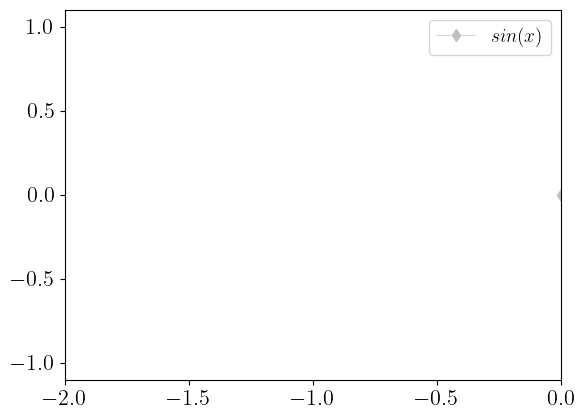

In [23]:
xs =np.linspace(0, 2*np.pi,101)
ys = np.sin(xs)

plt.plot(xs, ys, '-d',label=r"$sin(x)$", color ='silver',linewidth =0.5)
plt.legend()
plt.xlim([-2,0])
plt.show()

In [45]:
lists = [] 
for i in range(3):
    lists.append(i)
# aa =lists.reverse()
print(lists[::-1])

[2, 1, 0]


In [1]:
# Plot made using Macbook 

Created directory: /Volumes/ESD-USB/DATA_sns_junction_project_from_service/codes_data_list_via_plot/CPR/Plots_collection


/var/folders/sx/8zcff90529g69ly3gjnfhzgr0000gn/T/ipykernel_41341/2216301458.py:275: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_xticklabels([r"\bf{0.5}",  r"\bf{1}"])


60
65
Plot saved to: /Volumes/ESD-USB/DATA_sns_junction_project_from_service/codes_data_list_via_plot/CPR/Plots_collection/Fig2_v7.png


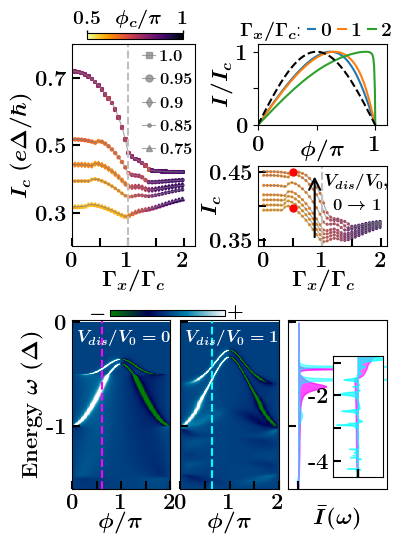

In [2]:
# Use scatter plot to indicate the skewness of the CPR.

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from read_plot_assist import *


reduced_factor = (2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9)*0.3*2 

               # such that the unit is e \Delta /hbar, factor 2 is coming from the half 1 of the electron operator 

import pandas as pd
import csv

# ======================
# 主程序
# ======================
def main():
    # 获取绘图参数
    plot_config = set_plotting_style()
    
    # 设置工作目录
    dir = os.getcwd() 
    dirF = os.path.join(dir, "Plots_collection")
    
    # 确保Plots_collection目录存在
    if not os.path.exists(dirF):
        os.makedirs(dirF)
        print(f"Created directory: {dirF}")
    else:
        print(f"Directory already exists: {dirF}")
    
    # 创建图形和布局
    ################  previous figure set   
    # width = 3.847 * 1.3
    # height = 0.64 * width*2
    # fig = plt.figure(figsize=(width, height))
    
    ############### updated figure set   
    # width = 3.847 * 2.1
    # height = 0.64 * width * 1.8

    # width = 3.847*1.6  # * 1.35
    # height = 1.4 * width #1.2 * width
    
    width = 3.847*1.0  # * 1.35
    height = 1.5 * width  #1.2 * width
    
    fig = plt.figure(figsize=(width, height))
    

    # 创建主GridSpec：2行1列
    main_gs = GridSpec(2, 1, figure=fig, height_ratios=[1.2, 1.0],hspace=0.4)
    
    # 顶部区域：创建2个面板的GridSpec
    top_gs = GridSpecFromSubplotSpec(1, 2, subplot_spec=main_gs[0], width_ratios=[1, 1.05],wspace=0.5)
    
    # top_gs_a = GridSpecFromSubplotSpec(3, 2, subplot_spec=top_gs[0,1], height_ratios=[0.1, 1, 1], width_ratios = [1,0.1]) # , hspace=0.4
    
    top_gs_a = GridSpecFromSubplotSpec(2, 1, subplot_spec=top_gs[0,1], height_ratios=[1,1],hspace=0.5)
    top_gs_b = GridSpecFromSubplotSpec(2, 1, subplot_spec=top_gs[0,0], height_ratios=[0.0,1],hspace=0.0)
    
    # 创建子图
    ax0 = fig.add_subplot(top_gs_a[0, 0])
    
    ax1 = fig.add_subplot(top_gs_b[1, 0])
    ax2 = fig.add_subplot(top_gs_a[1, 0])
    
    # ax1_bar = fig.add_subplot(top_gs_b[0, 0])
    
    # 底部区域：创建3个面板的GridSpec
    bottom_gs = GridSpecFromSubplotSpec(1, 3, subplot_spec=main_gs[1], width_ratios=[1, 1, 1],wspace=0.1)
        
    ax3 = fig.add_subplot(bottom_gs[0, 0])
    ax4 = fig.add_subplot(bottom_gs[0, 1])
    ax5 = fig.add_subplot(bottom_gs[0, 2])
    
    # 获取配置参数
    colors = plot_config['colors']
    line_styles = plot_config['line_styles']
    legend_settings = plot_config['legend_settings']
    tick_settings = plot_config['tick_settings']
    grid_settings = plot_config['grid_settings']
    sizes = plot_config['sizes']
    labelpad_distance = -1
    
    # ======================
    # Panel 1: CPR curves
    # ======================
    # # ax0 = fig.add_subplot(gs[1, 0])
    # vtaus0 = [0.842, 1.000]
    # selected_bs = [0.5, 2.0]
    
    # # 自定义离散颜色方案
    vtau_colors = {
        0.842: colors['vtau_0.50'],
        0.882: colors['vtau_0.80'],
        0.904: colors['vtau_0.90'],
        0.934: colors['vtau_0.95'],
        1.000: colors['vtau_1.00']
    }
    
    # # 绘制数据
    # ====================== ====================== ====================== ======================
    # Panel 0: CPR for a fixed vtau, at various B
    # ====================== ====================== ====================== ======================
    Bs = [0, 1.0, 2.0]
    vtau = 0.882 
    
    file_path = f"CPR_adaptive=True_B_sweep_Vdis=0.0_Vtau={vtau:.3f}_disorder1_cp1.csv"
    # 读取数据 
    metadata, df = read_cpr_data(file_path)
    
    b_values = np.sort(df['B'].unique())
    phase_values = np.sort(df['Phase'].unique())
    
    # 重塑数据为矩阵
    current_matrix = df.pivot(index='B', columns='Phase', values='Current').values
    color = 'b'
    
    # 创建自定义图例句柄和标签
    handles = []
    labels = []
    
    # 首先添加标题作为第一个条目（使用空线但显示标签）
    from matplotlib.lines import Line2D
    title_handle = Line2D([0], [0], color='none', marker='', linestyle='')
    handles.append(title_handle)
    labels.append(r'$\boldsymbol{\Gamma_x/\Gamma_c}$:')
    
    # 然后添加实际的图例条目
    for B in Bs:
        idx = list(b_values).index(B)
        line, = ax0.plot(phase_values/np.pi, current_matrix[idx,:]/np.max(current_matrix[idx,:]),
                 '-', linewidth=line_styles['default']['linewidth'])
        handles.append(line)
        labels.append(r'$\boldsymbol{%.0f}$'%B)
    
    ax0.plot(phase_values/np.pi, np.sin(phase_values),'--',color = 'k',linewidth=1.5)
    
    # 设置轴标签
    # ax0.yaxis.set_label_position("right")
    # ax0.yaxis.set_ticks_position("right")
    
    ax0.set_xlabel(r'$\boldsymbol{\phi/\pi}$',fontsize=sizes['label'], labelpad = labelpad_distance-10) # label_dis
    
    ax0.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
    ax0.set_xticklabels([r"\bf{0}", r"", r"\bf{1}", r"", r"\bf{2}"], 
                       color=tick_settings['color'], size=sizes['tick']) 
    
    ax0.set_yticks([-1, -0.5, 0, 0.5, 1])
    ax0.set_yticklabels([r"\bf{-1}", r"", r"\bf{0}", r"", r"\bf{1}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    # 创建图例，所有内容在一排
    ax0.legend(handles, labels, 
               ncols = len(handles),  # 总列数等于句柄数量
               handlelength = 0.4, 
               handletextpad = 0.3, 
               columnspacing = 0.3,  # 增加列间距
               fontsize = 14,
               facecolor = 'none',
               edgecolor ='none',
               loc = 'upper center',
               bbox_to_anchor = (0.40, 1.5),
               frameon = False)
    
    ax0.set_ylabel(r'$\boldsymbol{I/I_{c}}$', fontsize=sizes['label'], labelpad=labelpad_distance+3)
    ax0.set_ylim([0, 1.1])
    ax0.set_xlim([0, 1.1])


    # ====================== ====================== ====================== ======================
    # Panel 1: Critical current vs B for several Dtaus
    # ====================== ====================== ====================== ======================
    
    vtaus = [0.842, 0.882, 0.904, 0.934, 1.000]
    Dtaus = [0.75, 0.85, 0.90, 0.95, 1.00]
    # 为不同 vtau 创建颜色映射
    
    line_cmap = plt.cm.jet
    vtau_colors_cmap = line_cmap(np.linspace(0,1, len(vtaus))) # 
    
    vtau_color_dict = dict(zip(vtaus, vtau_colors_cmap))
    scatter_cmap = plt.cm.inferno_r
    
    # ax1_right = ax1.twinx()

    markers = ['^','.','d','o','s']
    marker_sizes = [4,6,4,3,3]
    # ax1 = fig.add_subplot(gs[0, 0])
    handle_list = []
    # 使用离散颜色方案绘制数据
    for i0, vtau in enumerate(vtaus):
        # color = vtau_colors_cmap[i0]
        file_path = f"CPR_data_sweep_B_vtau_{vtau:.3f}_separate_summary_Vdis=0.0_disorder1_cp19th2.csv"
        # file_path = f"CPR_data_sweep_B_vtau_{vtau:.3f}_separate_summary_v0.csv"
        columns_to_read = ['B', 'Ic_max', 'Ic_min','phi0_max','phi0_min']
        
        metadata, df = read_select_data(file_path, columns_to_read=columns_to_read)

        xs = df['B'].values
        ys = (df['Ic_max'].values - df['Ic_min'].values)/2/reduced_factor
        cs = df['phi0_max'].values/np.pi
        line1, = ax1.plot(-xs-0.5, ys, color='grey', linestyle ='-', marker =markers[i0],markersize =5, 
                 linewidth =0.8, alpha=0.7, label = r"%.2f"%Dtaus[i0]) #Dtaus, fontsize= sizes['legend']
        
        ax1.plot(xs, ys, color='grey', linestyle ='-', marker =markers[i0],markersize =0, 
                 linewidth =0.8, alpha=0.7, label = r"%.2f"%Dtaus[i0]) #Dtaus, fontsize= sizes['legend']
        # print(len(xs))
        # masks = ::5
        ax1.scatter(xs[::3], ys[::3], s=marker_sizes[i0], marker= markers[i0], linestyle ='-', 
                    c=cs[::3], cmap = scatter_cmap, vmin=0.5, vmax=1, linewidth =1.5)
        handle_list.append(line1)
        
    # 设置轴标签
    ax1.set_xlabel(r'$\boldsymbol{\Gamma_{x}/\Gamma_c}$', fontsize=sizes['label'], labelpad=labelpad_distance )
    # ax1.xaxis.label.set_position((0.2, 0.05))
    
    ax1.set_ylabel(r'$\boldsymbol{I_{c}~(e\Delta/\hbar)}$', fontsize=sizes['label'],labelpad=labelpad_distance +3)
    # ax1.set_ylabel(r'', fontsize=sizes['label'])
    labels_list = [r'\bf{0.75}',r'\bf{0.85}',r'\bf{0.9}',r'\bf{0.95}',r'\bf{1.0}'] 
    
    ax1.legend(handle_list[::-1], labels_list[::-1], 
                ncols = 1,  # 总列数等于句柄数量
               handlelength = 0.8, 
               handletextpad = 0.3, 
               columnspacing = 0.08,  # 增加列间距
               fontsize = sizes['legend']-2,
               facecolor = 'none',
               edgecolor ='none',
               loc = 'upper center',
               bbox_to_anchor = (0.78, 1.05),
               frameon = False)
    
    # 设置刻度
    ax1.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
    ax1.set_xticklabels([r"\bf{0}", r"", r"\bf{1}", r"", r"\bf{2}"], 
                       color=tick_settings['color'], size=sizes['tick']) 
    
    # ax1.set_xticklabels([r"\bf{0}", r"\bf{0.5}", r"\bf{1.0}", r"\bf{1.5}", r"\bf{2.0}"], 
    #                    color=tick_settings['color'], size=sizes['tick'])

    ax1.set_yticks([0, 0.3, 0.5, 0.7, 1])
    ax1.set_yticklabels([r"\bf{0}", r"\bf{0.3}", r"\bf{0.5}",r"\bf{0.7}", r"\bf{1.0}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    ax1.set_ylim([0.2, 0.8])
    ax1.set_xlim([0, 2.2])
    ax1.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
                        
    # 设置网格
    # ax1.grid(**grid_settings)
    
    # 设置刻度方向
    ax1.tick_params(direction=tick_settings['direction'], length=tick_settings['length'], width=tick_settings['width'])

    
    cbar_ax = fig.add_axes([0.1, 0.98, 0.02, 0.35])
    
    # 创建垂直颜色条（在已有的 cbar_ax 上）
    cbar = mpl.colorbar.ColorbarBase(cbar_ax, 
                                           cmap= scatter_cmap,  # 使用其中一个colormap
                                           norm=mpl.colors.Normalize(vmin=0.5, vmax=1),
                                           orientation='horizontal')
    # cbar.ax.tick_params(labelsize=12) # ,direction ='in' # sizes['cbar_tick']
    
    cbar.ax.set_xticklabels([r"\bf{0.5}",  r"\bf{1}"])
    cbar.ax.tick_params(labelsize =  sizes['cbar_tick'],
                            length = 2.0 ,#tick_settings['length'],
                            width= 1,
                            pad= 2)
    cbar_ax.text(0.55, 1.65, r'$\boldsymbol{\phi_{c}/\pi}$',
                 transform=cbar_ax.transAxes,
                 fontsize = sizes['cbar_label'],ha='center', va='bottom')  # sizes['cbar_label']
    cbar.ax.xaxis.set_ticks_position('top')
    cbar.ax.xaxis.set_label_position('top')
    
    cbar_ax.set_position([0.12, 0.93,  0.25, 0.01])  # [左, 下, 宽, 高]    

    
    # ax1_right.set_ylim(ax3.get_ylim())
    # ax1_right.set_yticks(ax3.get_yticks())

    # ====================== ====================== ====================== ======================
    # Panel 2: CPR curves B, for single Dtau, various Vdis 
    # ====================== ====================== ====================== ======================

    # vtaus = [0.842, 0.882, 0.904, 0.934, 1.000]  [0.338] -> [0.05]
    vtau = 0.882
    
    # 1. 使用指定的透明度值
    alpha_max = 1.0
    alpha_min = 0.2
    alpha_values = [alpha_max,
                    alpha_max*0.75, 
                    alpha_max*0.5,
                    alpha_min*1.45,
                    alpha_min*1.25,
                    alpha_min*1.1,
                    alpha_min]
    
    Vdis_list = [0.0,0.1,0.2,0.3,0.5,0.8,1.0] # ,1.2,1.5,1.8
    Dtaus = [0.75, 0.85, 0.90, 0.95, 1.00]
    
    # 使用离散颜色方案绘制数据
    for i in range(len(Vdis_list)):
        # print(i)
        # color =  vtau_colors[vtau]
        
        color = vtau_color_dict[vtau]
        file_path = f"CPR_data_sweep_B_vtau_{vtau:.3f}_separate_summary_Vdis={Vdis_list[i]:.1f}_disorder1.csv"
        # columns_to_read = ['B', 'Ic_max', 'Ic_min']
        # metadata, df = read_select_data(file_path, columns_to_read=columns_to_read)

        columns_to_read = ['B', 'Ic_max', 'Ic_min','phi0_max','phi0_min']
        
        metadata, df = read_select_data(file_path, columns_to_read=columns_to_read)

        xs = df['B'].values
        ys = (df['Ic_max'].values - df['Ic_min'].values)/2/reduced_factor
        cs = df['phi0_max'].values/np.pi

        
        if i ==0:
            # pass
            # file_path = f"CPR_data_sweep_B_vtau_{0.842}_separate_summary_Vdis={Vdis_list[i]:.1f}_disorder1_cp19th.csv"
            file_path = f"CPR_data_sweep_B_vtau_{vtau:.3f}_separate_summary_Vdis={Vdis_list[i]:.1f}_disorder1_cp19th2.csv"
            columns_to_read = ['B', 'Ic_max', 'Ic_min','phi0_max','phi0_min']
        
            metadata, df = read_select_data(file_path, columns_to_read=columns_to_read)

            xs = df['B'].values
            ys = (df['Ic_max'].values - df['Ic_min'].values)/2/reduced_factor
            cs = df['phi0_max'].values/np.pi
            
            ax2.plot(xs, ys, color='grey', linestyle ='-', marker ='.',markersize =0, 
                     linewidth =0.8, alpha=0.7, label = r"%.2f"%Dtaus[i0]) #Dtaus, fontsize= sizes['legend']

            ax2.scatter(xs[::3], ys[::3], s=6, marker= '.',
                    c=cs[::3], cmap = scatter_cmap, vmin=0.5, vmax=1)
            
            # ax2.plot(df['B'].values, (df['Ic_max'].values - df['Ic_min'].values)/2/reduced_factor,
            #          '-', color=color, linewidth=line_styles['default']['linewidth'], alpha =alpha_values[i] )    
        else:

            ax2.plot(xs, ys, color='grey', linestyle ='-', marker ='.',markersize =0, 
                     linewidth = 0.8, alpha=0.7, label = r"%.2f"%Dtaus[i0]) #Dtaus, fontsize= sizes['legend']

            ax2.scatter(xs[::3], ys[::3], s=6, marker= '.',
                        c=cs[::3], cmap = scatter_cmap, vmin=0.5, vmax=1)
                        
            # ax2.plot(df['B'].values, (df['Ic_max'].values - df['Ic_min'].values)/2/reduced_factor,
            #          '-', color=color, linewidth=line_styles['default']['linewidth'], 
            #          alpha = alpha_values[i])  # 使用指定的alpha_values


    # 设置轴标签

    # ax2.yaxis.set_label_position("right")
    # ax2.yaxis.set_ticks_position("right")
    # ax.set_ylabel("Y-axis Label", rotation=-90, labelpad=15) # Adjust rotation and padding as needed


    ax2.set_xlabel(r'$\boldsymbol{\Gamma_{x}/\Gamma_c}$', fontsize=sizes['label'], labelpad=labelpad_distance)
    ax2.set_ylabel(r'$\boldsymbol{I_{c}}$', fontsize=sizes['label'],labelpad=labelpad_distance-8) # ~(e\Delta/\hbar)
    
    # 设置刻度
    ax2.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
    ax2.set_xticklabels([r"\bf{0}", r"", r"\bf{1}", r"", r"\bf{2}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    # # 2. 调整panel2的y轴范围
    
    
    ax2.set_yticks([0.35, 0.4, 0.45])
    ax2.set_yticklabels([r"\bf{0.35}", r"", r"\bf{0.45}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    ax2.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    
    ax2.plot([0.5,0.5],[18.44/reduced_factor, 20.94/reduced_factor],'.',color ='red',markersize =10)
    
    # 设置网格
    # ax2.grid(**grid_settings)
    
    # 设置刻度方向
    ax2.tick_params(direction=tick_settings['direction'], length=tick_settings['length'], width=tick_settings['width'])


    # cbar_ax = fig.add_axes([0.1, 0.98, 0.5, 0.02])  # [x, y, width, height]






    # add arrow to ax2 
    ax2.annotate('', xytext=(0.44, 0.08),xy=(0.44, 0.9),  
                 xycoords='axes fraction',arrowprops=dict(arrowstyle='->', color='black', lw=1.5,
                                                          mutation_scale=20))
    ax2.text(0.52, 0.8, r'$\boldsymbol{V_{dis}/V_0,}$', transform=ax2.transAxes,ha='left', va='center', 
             fontsize=sizes['legend']-2, rotation=0)
    ax2.text(0.58, 0.5, r'$\boldsymbol{0 \rightarrow 1}$', transform=ax2.transAxes,ha='left', va='center', 
             fontsize=sizes['legend']-2, rotation=0)
    
    ax2.set_ylim([0.34, 0.46])  # 调整y轴范围
    # ====================== ====================== ====================== ======================
    # Panel 3, 4, 5: CPR density and line cut plot 
    # ====================== ====================== ====================== ======================
    
    ## part for DOS and CPR line cuts

    file_path_0 = "CPR_DOS_adaptive=True_Vdis=0.0_Vtau=0.882_disorder1_B=0.5_1.csv" # B=2.0, _cp
    file_path_1 = "CPR_DOS_adaptive=True_Vdis=1.0_Vtau=0.882_disorder1_B=0.5_1.csv"

    # file_path_0 = "ABS_adaptive=True_Vdis=0.0_Vtau=0.882_disorder1_B=2.0.csv"
    # file_path_1 = "ABS_adaptive=True_Vdis=1.0_Vtau=0.882_disorder1_B=2.0.csv"
    
    # 读取数据 
    metadata0, df0 = read_dc_data(file_path_0)
    metadata1, df1 = read_dc_data(file_path_1)
    
    phase_values = np.sort(df0['Phase'].unique())
    vbias_values = np.sort(df0['Energy'].unique())
    
    # 重塑数据为矩阵
    DOS_matrix_0 = 1*df0.pivot(index='Phase', columns='Energy', values='DOS').values
    DOS_matrix_1 = 1*df1.pivot(index='Phase', columns='Energy', values='DOS').values
    
    # 简化网格创建
    vbias_grid = vbias_values / 0.3  # 转换为 Delta单位
    dx0 = vbias_grid[1]-vbias_grid[0]
    dy0 = phase_values[1] - phase_values[0]
    X, Y = np.meshgrid(phase_values/np.pi,vbias_grid)


    # def create_simple_custom_seismic(original_seismic):
    #     # 获取原始seismic的颜色数组
    #     seismic_colors = original_seismic(np.linspace(0, 1, 256))
        
    #     # 只替换最中心的几个点（索引126-130）
    #     grey_color = [0.7, 0.7, 0.7, 1.0]  # 中灰色
    #     for i in range(126, 131):
    #         seismic_colors[i] = grey_color
        
    #     # 创建新的colormap
    #     custom_seismic = ListedColormap(seismic_colors, name='custom_seismic')
    #     return custom_seismic
    
    # custom_seismic = create_simple_custom_seismic(plt.cm.seismic)
    
    dos_map = 'ocean' #'gist_earth' #'terrain'
    
    # 使用pcolormesh绘制热图 (兼容性更好)
    # DOS_matrix_1 -(1*DOS_matrix_0).T, #np.gradient(current_matrix,dx0,axis=1),   current_matrix,np.log10
    pc = ax3.pcolormesh(X, Y, (1*DOS_matrix_0).T, cmap = dos_map,shading = 'auto', vmin=-1500,vmax=1500,alpha=1)
    
    # 设置轴标签
    ax3.set_xlabel(r'$\boldsymbol{\phi/\pi}$', fontsize=sizes['label'], labelpad=labelpad_distance)
    ax3.set_ylabel(r'$\boldsymbol{\textbf{Energy}~\omega~(\Delta)}$', fontsize=sizes['label'],
                   labelpad=labelpad_distance +3)

    ax3.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
    ax3.set_xticklabels([r"\bf{0}", r"", r"\bf{1}", r"", r"\bf{2}"], 
                       color=tick_settings['color'], size=sizes['tick'])

    ax3.set_yticks([-4, -2,-1,0])
    ax3.set_yticklabels([r"\bf{-4}", r"\bf{-2}",r"\bf{-1}", r"\bf{0}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    # ax3.set_ylim([-4.6, 0.1])
    ax3.set_ylim([-1.6, 0.02])

    # ax3.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    # 设置网格
    # ax3.grid(**grid_settings)
    
    # 设置刻度方向
    ax3.tick_params(direction=tick_settings['direction'], length=tick_settings['length'], width=tick_settings['width'])
    
    ax3.text(0.06, 0.9, r'$\boldsymbol{V_{dis}/V_0 = 0}$', color = 'white',
             transform=ax3.transAxes,ha='left', va='center', 
             fontsize=sizes['legend']-2, rotation=0)
    
    # 使用pcolormesh绘制热图 (兼容性更好)
    pc = ax4.pcolormesh(X, Y,  # DOS_matrix_1 -
        (1*DOS_matrix_1 ).T, #np.gradient(current_matrix,dx0,axis=1),   current_matrix,np.log10
        cmap=dos_map,  # 更平滑的渲染
        vmin=-2000,  # 最小值设为0
        vmax=2000,alpha=1
    )
    # 设置轴标签
    ax4.set_xlabel(r'$\boldsymbol{\phi/\pi}$', fontsize=sizes['label'], labelpad=labelpad_distance)
    ax4.set_ylabel(r'', fontsize=sizes['label'])

    ax4.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
    ax4.set_xticklabels([r"\bf{0}", r"", r"\bf{1}", r"", r"\bf{2}"], 
                       color=tick_settings['color'], size=sizes['tick'])

    ax4.set_yticks([-4, -2,-1,0])
    ax4.set_yticklabels([r"", r"",r"", r""], 
                       color=tick_settings['color'], size=sizes['tick'])
    # ax4.set_ylim([-4.6, 0.1])
    ax4.set_ylim([-1.6, 0.02])
    

    ax4.tick_params(direction=tick_settings['direction'], length=tick_settings['length'], width=tick_settings['width'])
    
    # 创建共用colorbar的位置
    cbar_bottom_ax = fig.add_axes([0.18, 0.45, 0.3, 0.01])  # 调整位置在底部
    
    # 创建共用colorbar
    cbar_bottom = mpl.colorbar.ColorbarBase(cbar_bottom_ax, 
                                           cmap= dos_map,  # 使用其中一个colormap
                                           norm=mpl.colors.Normalize(vmin=-2000, vmax=2000),
                                           orientation='horizontal')
    
    # 隐藏所有刻度
    cbar_bottom.ax.tick_params(which='both', length=0, labelbottom=False, labeltop=False)
    
    # 只在两端添加"+"和"-"标签
    cbar_bottom_ax.text(1.02, 0.58, r'$\boldsymbol{+}$', 
                       transform=cbar_bottom_ax.transAxes, 
                       fontsize=sizes['cbar_label'], 
                       ha='left', va='center')
    cbar_bottom_ax.text(-0.02, 1.5, r'$\boldsymbol{-}$', 
                       transform=cbar_bottom_ax.transAxes, 
                       fontsize=sizes['cbar_label'], 
                       ha='right', va='center')



    
    # 添加颜色条
    # cax = plt.subplot(gs[0, 0])
    # cax = ax4.inset_axes([1.02, 0.1, 0.03, 0.8])
    # plt.colorbar(pc, cax=cax, orientation='vertical', label='dc Current (a.u.)')

    CPR_0 = np.trapz(DOS_matrix_0, vbias_values,axis= 1)/(2*np.pi)
    CPR_1 = np.trapz(DOS_matrix_1, vbias_values,axis= 1)/(2*np.pi)
    print(np.argmax(CPR_0))
    print(np.argmax(CPR_1))
    
    # 3. bottom panels的左中里的line cut采用不同颜色
    ax3.axvline(x=phase_values[np.argmax(CPR_0)]/np.pi, linestyle='--', 
                color=colors['linecut_0'], linewidth=1.5)  # 使用红色
    ax4.axvline(x=phase_values[np.argmax(CPR_1)]/np.pi, linestyle='--', 
                color=colors['linecut_1'], linewidth=1.5)  # 使用蓝色
    ax4.text(0.06, 0.9, r'$\boldsymbol{V_{dis}/V_0 = 1}$',color ='white',transform=ax4.transAxes, 
             ha='left', va='center', fontsize=sizes['legend']-2, rotation=0)

    
    # ax3.set_facecolor('grey')
    # ax4.set_facecolor('grey')
    
    # 4. 给bottom的第三个panel用area fill
    # 计算line cut数据
    linecut_0 = DOS_matrix_0[np.argmax(CPR_0),:]
    linecut_1 = DOS_matrix_1[np.argmax(CPR_1),:]
    
    # 在ax5中使用area fill
    ax5.fill_betweenx(vbias_values/0.3, 0, linecut_0, 
                    color=colors['linecut_0'], alpha=0.7, label='Vdis=0.0')
    ax5.fill_betweenx(vbias_values/0.3, 0, linecut_1, 
                    color=colors['linecut_1'], alpha=0.5, label='Vdis=1.0')
    # ax5.legend(fontsize =sizes['legend'])
    
    # ax5.plot(DOS_matrix_0[np.argmax(CPR_0),:],vbias_values/0.3,'r--', alpha =0.9)
    # ax5.plot(DOS_matrix_1[np.argmax(CPR_1),:],vbias_values/0.3,'b', alpha =0.9)    
    # print(phase_values[np.argmax(CPR_0)]/np.pi)

    ax5.set_xlabel(r'$\boldsymbol{\bar{I}(\omega)}$', fontsize=sizes['label'], labelpad=labelpad_distance +10)
    ax5.set_yticks([-4, -2,-1,0])
    ax5.set_yticklabels([r"", r"",r"", r""], 
                       color=tick_settings['color'], size=sizes['tick'])
    # ax5.set_ylim([-4.6, 0.1])    
    ax5.set_ylim([-1.6, 0.02])
    
    ax5.set_xticks([0, 10000, 20000])
    ax5.set_xticklabels([r"",r"",r""], 
                       color=tick_settings['color'], size=sizes['tick'])
    ax5.set_xlim([-1000, 9000])
    # ax4.set_ylim([-4.6, 0.1])

    

    ax4.tick_params(direction=tick_settings['direction'], length=tick_settings['length'], width=tick_settings['width'])
        
    ax5.tick_params(direction=tick_settings['direction'], length=tick_settings['length'], width=tick_settings['width'])


    # 5. inset plot对应于主plot的范围，用虚线标明
    # These are in unitless percentages of the figure size. (0,0 is bottom left)
    left, bottom, width, height = [0.76, 0.17, 0.13, 0.21]
    ax_add_b = fig.add_axes([left, bottom, width, height])
    
    # 使用与主图相同的颜色
    ax_add_b.fill_betweenx(vbias_values/0.3, 0, linecut_0, 
                         color=colors['linecut_0'], alpha=0.6)
    ax_add_b.fill_betweenx(vbias_values/0.3, 0, linecut_1, 
                         color=colors['linecut_1'], alpha=0.7)
    
    # 设置轴标签
    ax_add_b.set_xlabel(r'', fontsize=sizes['label'])
    ax_add_b.set_ylabel(r'', fontsize=sizes['label'])
    
    # 设置刻度
    ax_add_b.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
    ax_add_b.set_xticklabels([r"", r"", r"", r"", r""], 
                       color=tick_settings['color'], size=sizes['tick'])
    ax_add_b.set_yticks([-1,-2,-3,-4])
    ax_add_b.set_yticklabels([r"", r'\bf{-2}', r"", r'\bf{-4}'], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    # 6. 用虚线标明主plot的范围
    ax_add_b.set_xlim([-300, 300])
    ax_add_b.set_ylim([-4.5, -0.8])
    
    # 添加虚线框表示主图范围
    ax5_ylim = ax5.get_ylim()
    ax5_xlim = ax5.get_xlim()

    # ax_add_b.grid(**grid_settings)
    
    # 设置刻度方向
    ax_add_b.tick_params(direction=tick_settings['direction'], 
                   length=tick_settings['length'], 
                   width=tick_settings['width'])
    # ======================
    # 调整布局并保存
    # ======================
    plt.subplots_adjust(left=0.08, right=0.90, bottom=0.15, top=0.92)
    
    # 保存图形到Plots_collection目录
    output_path = os.path.join(dirF, "Fig2_v7.png")
    pdf_output_path = os.path.join(dirF, "Fig2_v7.pdf")
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
    plt.savefig(pdf_output_path, dpi=300, bbox_inches='tight', facecolor='white') #colors['background']
    
    print(f"Plot saved to: {output_path}")
    plt.show()

# ======================
# 运行主程序
# ======================
if __name__ == "__main__":
    main()